In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

train = pd.read_csv('train.csv')
train.head()





,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1(a)
## Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

LotArea has the highest number of outliers at 69.



Number of outliers for LotArea =  LotArea    69
dtype: int64
Number of outliers for GrLivArea =  GrLivArea    31
dtype: int64
Number of outliers for TotalBsmtSF =  TotalBsmtSF    61
dtype: int64
Number of outliers for GarageArea =  GarageArea    21
dtype: int64


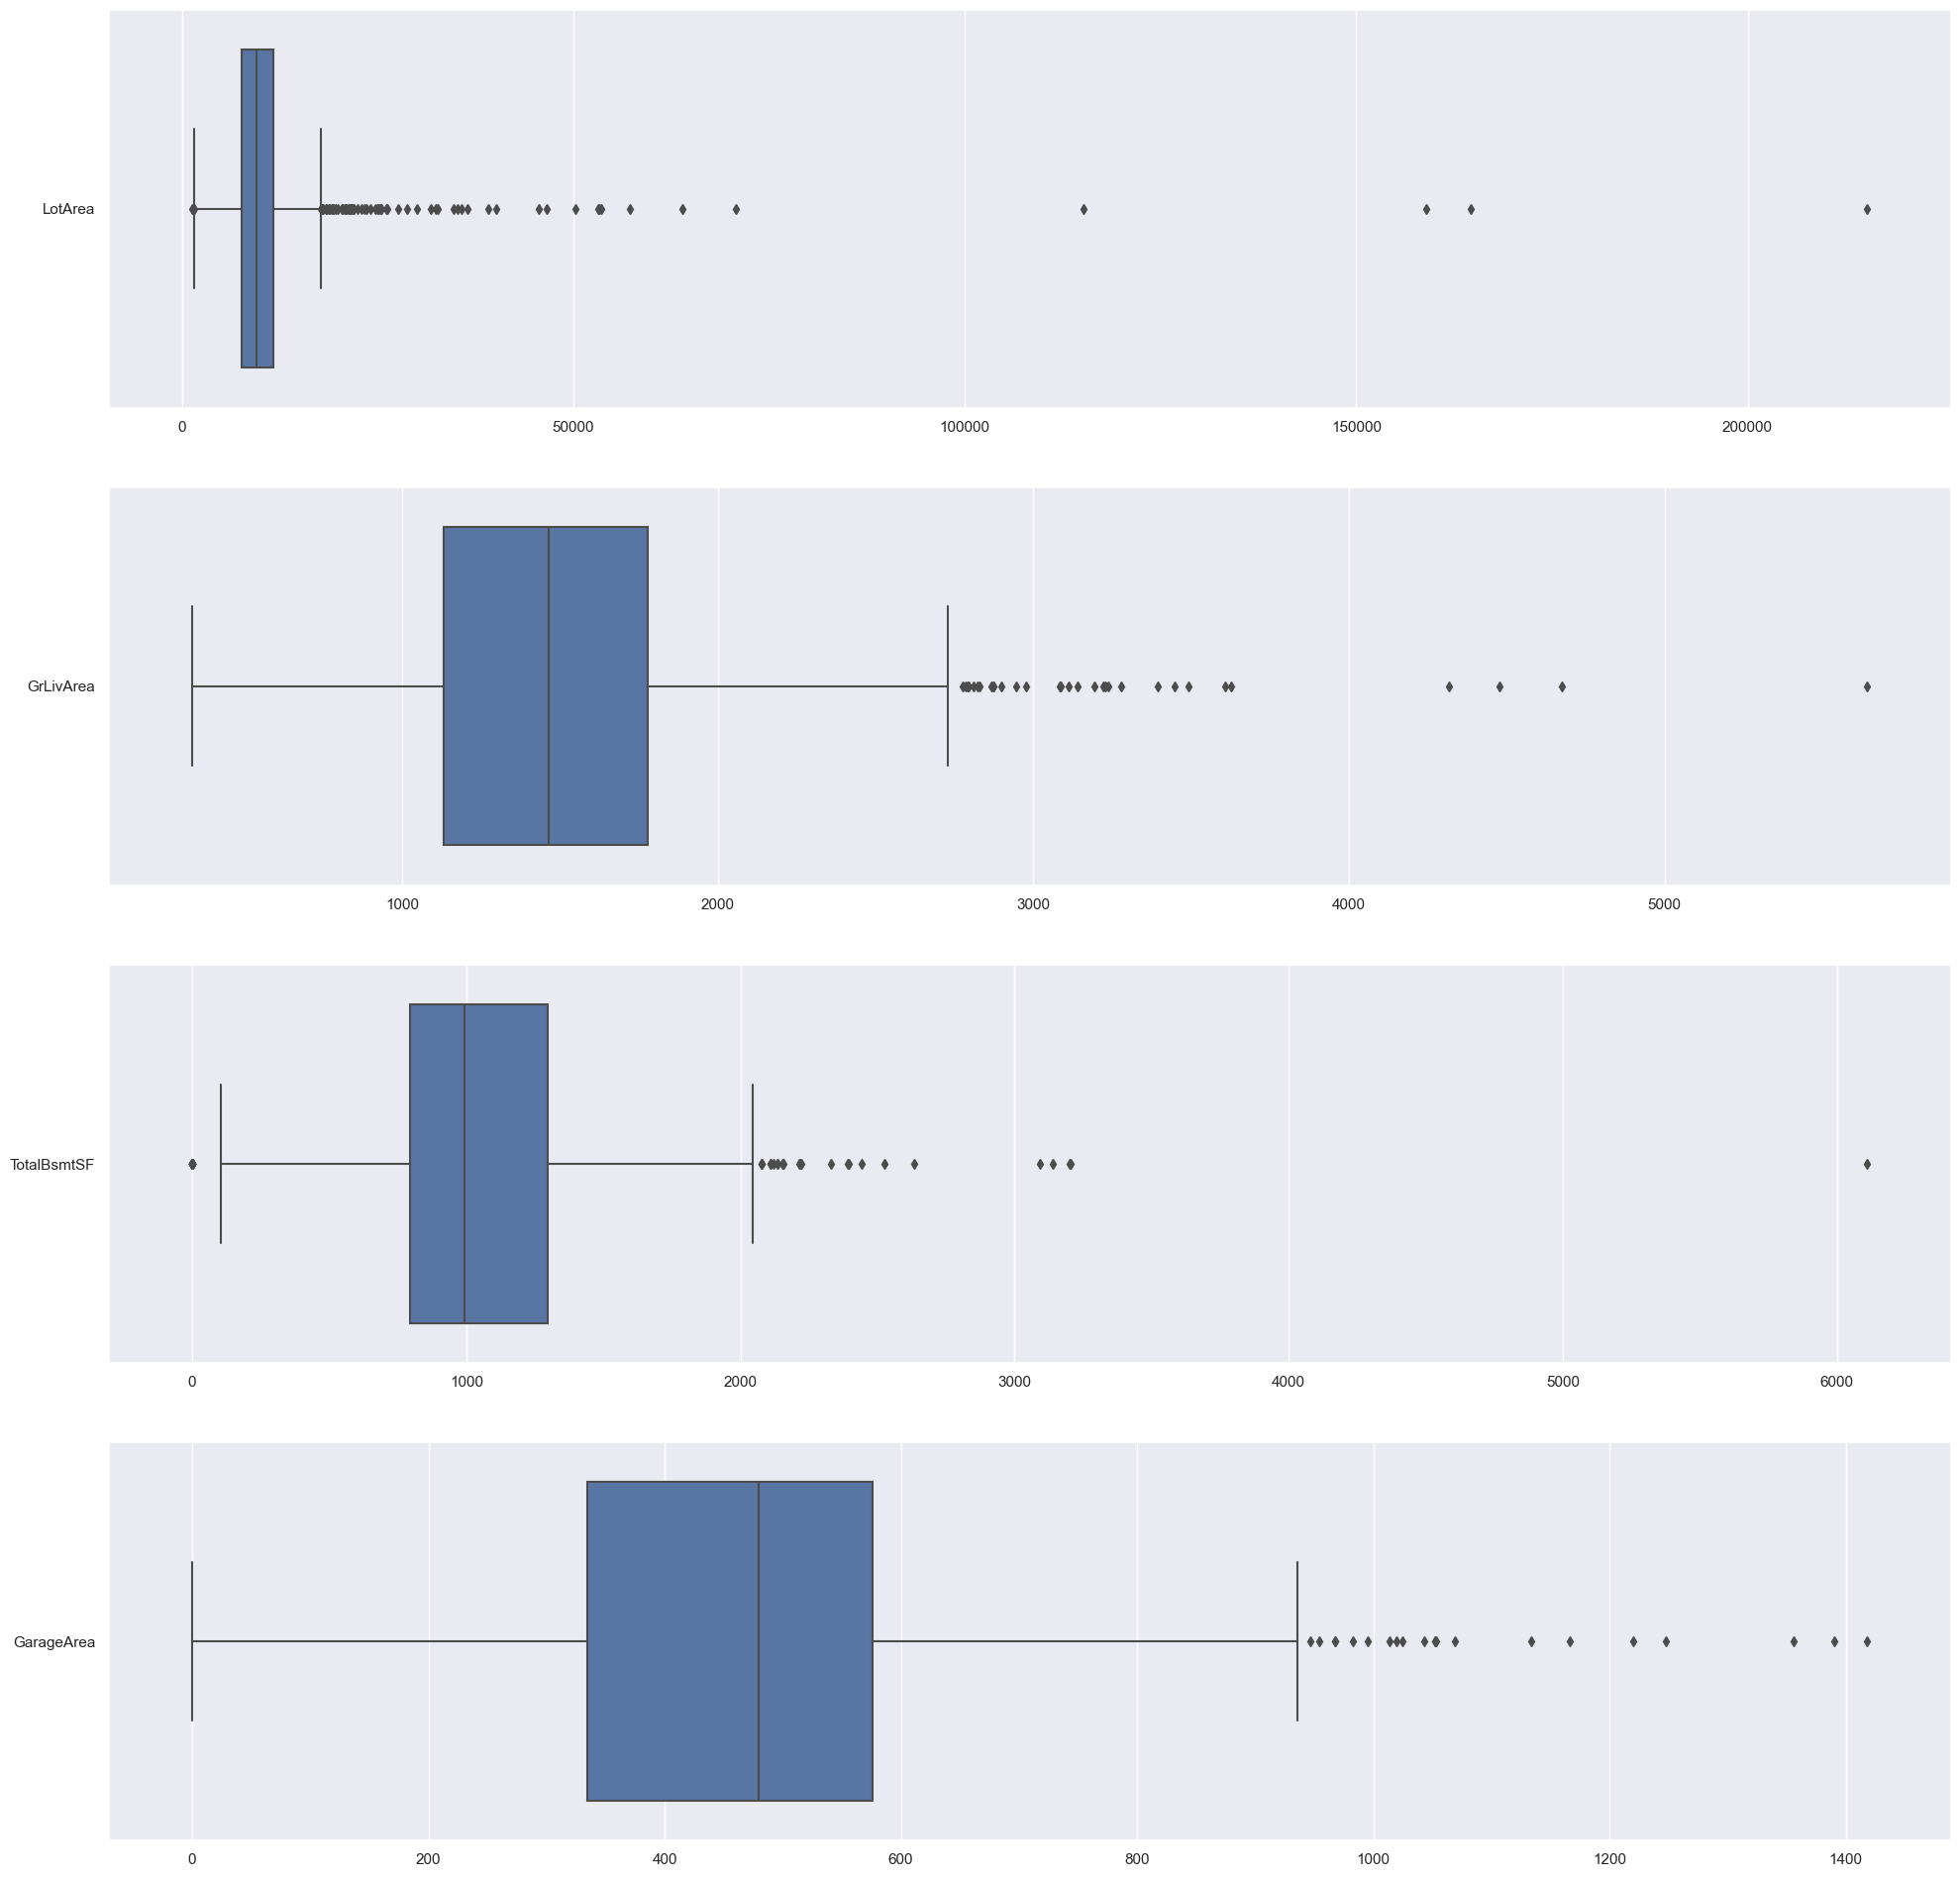

In [2]:
#Problem 1

#(a)

saleprice = pd.DataFrame(train['SalePrice'])
saleprice.head()

lotarea = pd.DataFrame(train['LotArea'])
lotarea.head()

gr = pd.DataFrame(train['GrLivArea'])
gr.head() 

total = pd.DataFrame(train['TotalBsmtSF'])
total.head() 

garage = pd.DataFrame(train['GarageArea'])
garage.head() 



# Set up matplotlib figure with 4 rows and 1 columns
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = lotarea, orient = "h", ax = axes[0])
sb.boxplot(data = gr, orient = "h", ax = axes[1])
sb.boxplot(data = total, orient = "h", ax = axes[2])
sb.boxplot(data = garage, orient = "h", ax = axes[3])


#Function to count outliers
def outliers(data):
    Q3 = np.percentile(data, 75)
    Q1 = np.percentile(data, 25)
    IQR = Q3 - Q1
    topwhisker = Q3 + 1.5*IQR
    bottomwhisker = Q1 - 1.5*IQR
    
    #Loop through dataframe to filter out values greater than Q3, and lower than Q1
    num_outliers = (data < bottomwhisker).sum() + (data > topwhisker).sum()
    
    return num_outliers


print("Number of outliers for LotArea = ", outliers(lotarea))
print("Number of outliers for GrLivArea = ", outliers(gr))
print("Number of outliers for TotalBsmtSF = ", outliers(total))
print("Number of outliers for GarageArea = ", outliers(garage))






## Problem 1(b)
## Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

Grlivarea is the most skewed out of the 4 variables, and it is positively skewed as its right tail is much longer than its left tail.





<AxesSubplot:>

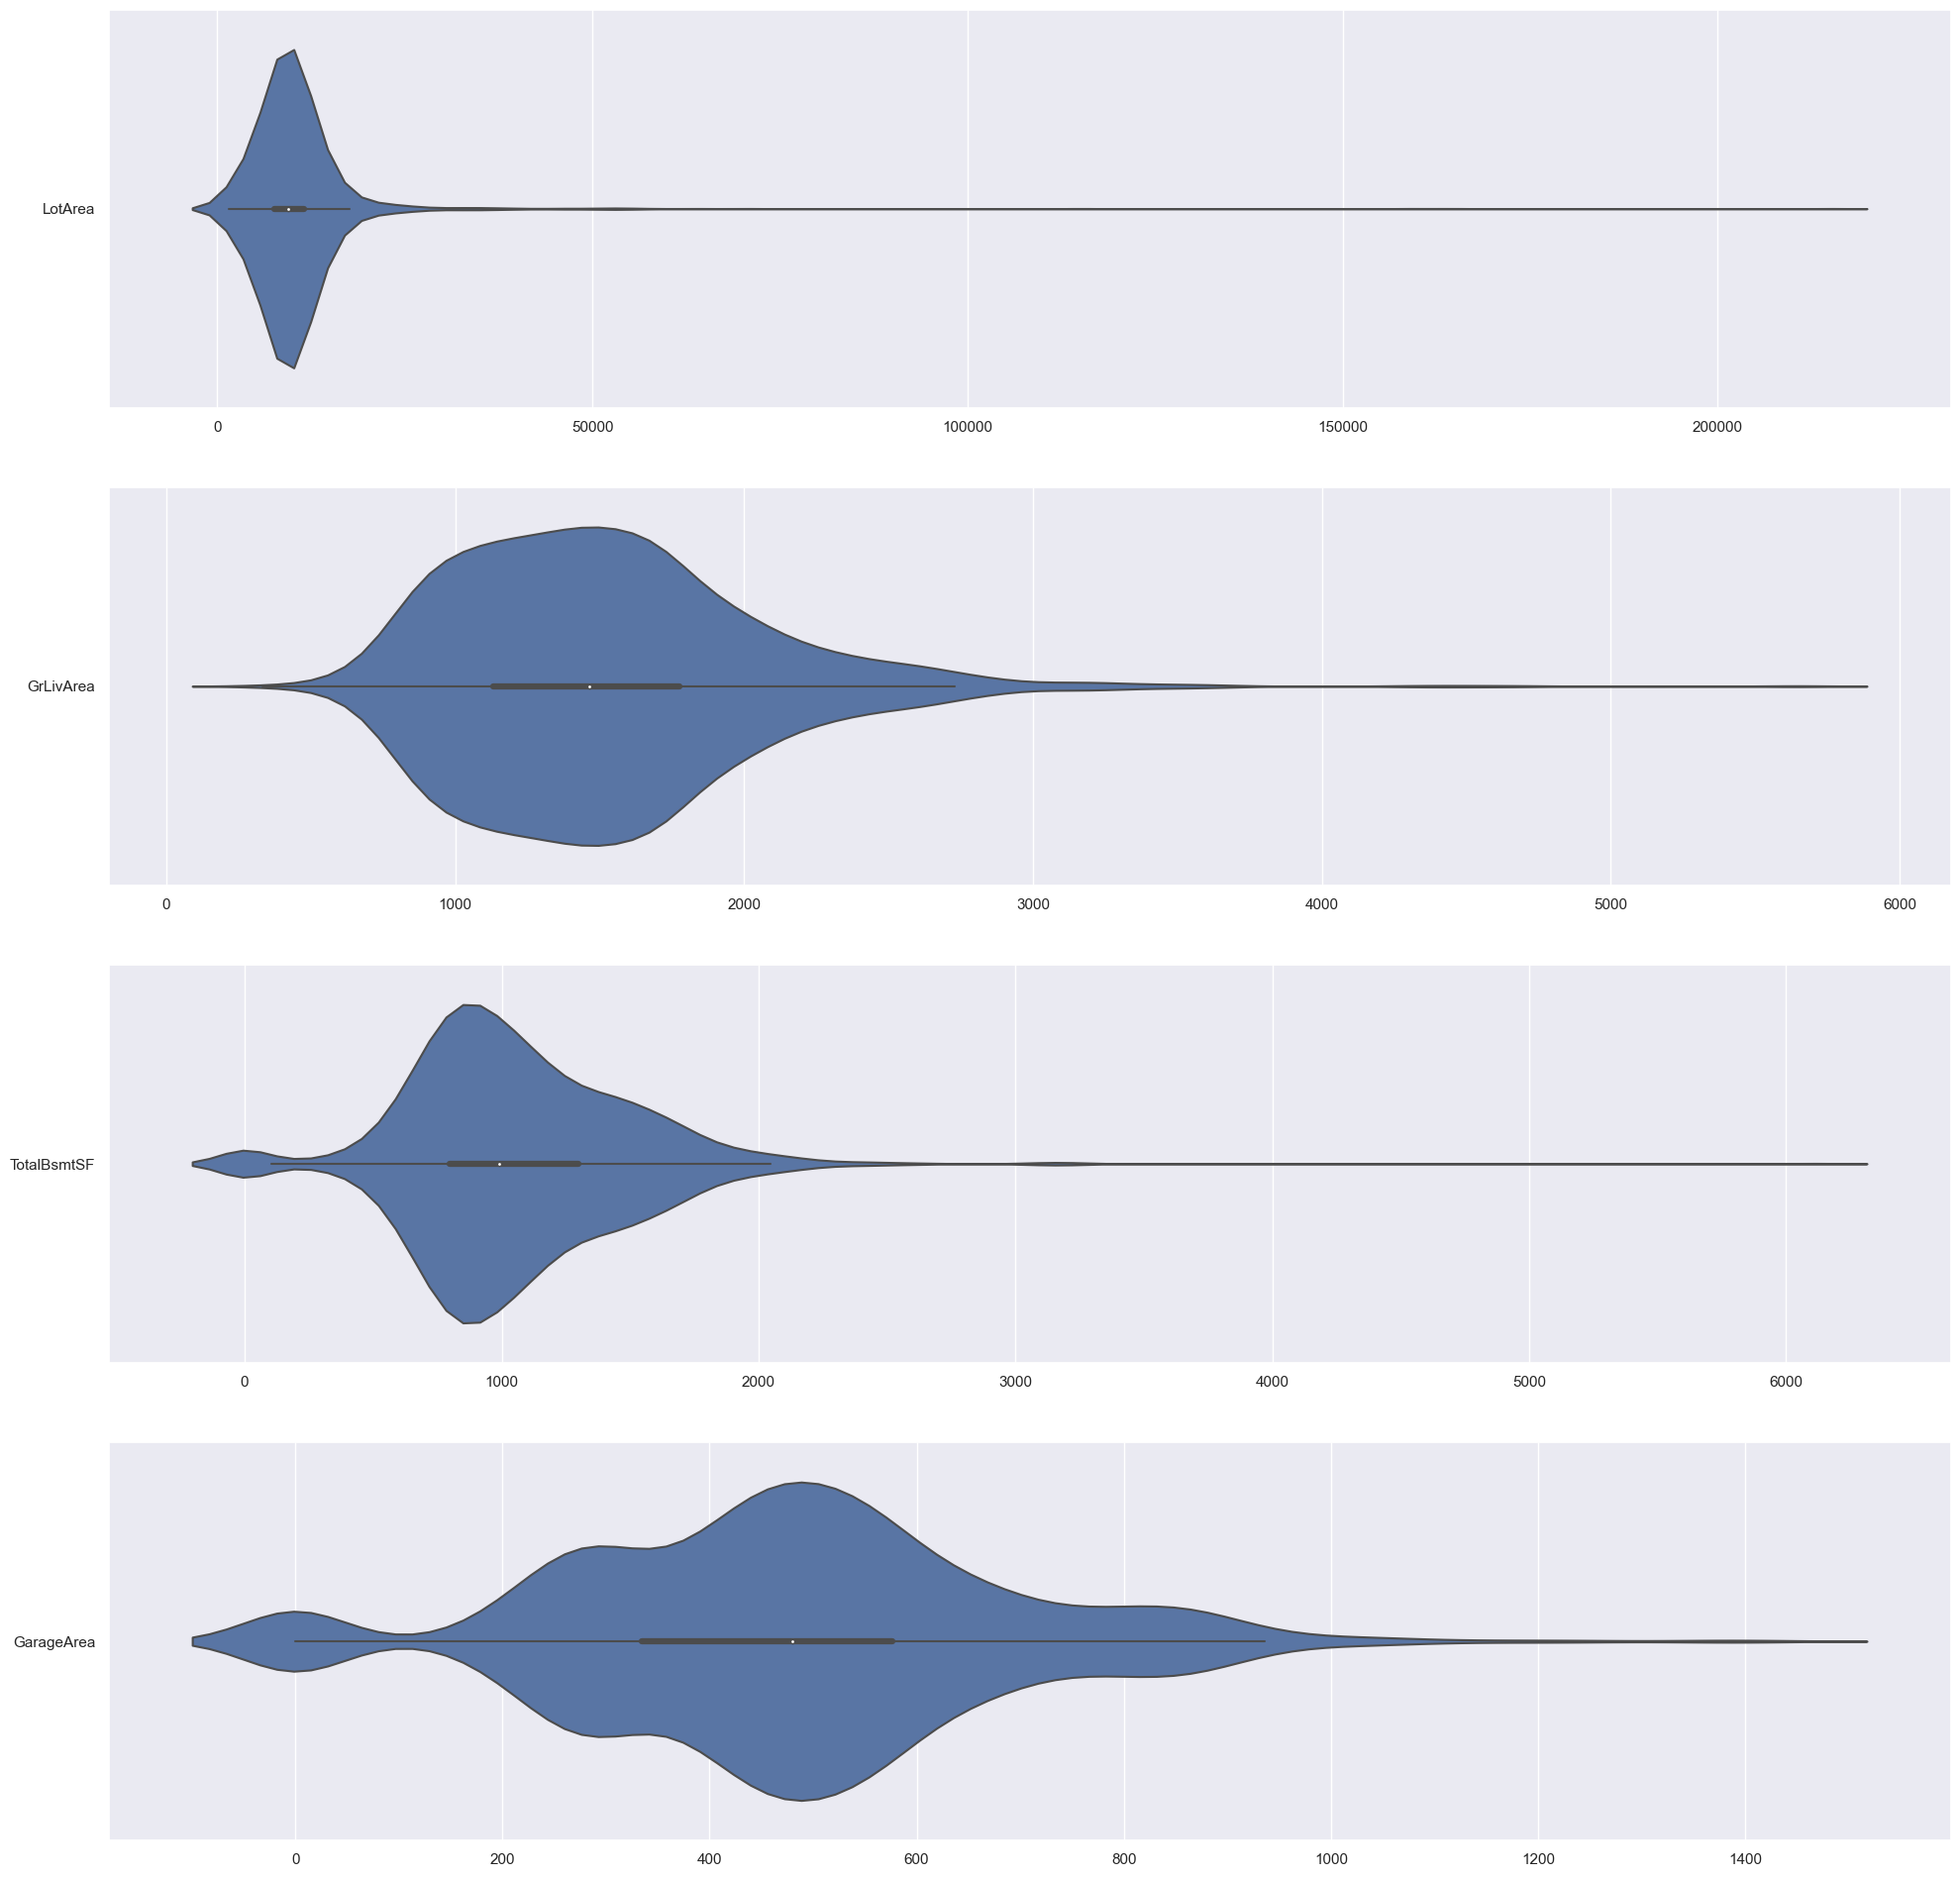

In [3]:
# Set up matplotlib figure with 4 rows and 1 columns
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.violinplot(data = lotarea, orient = "h", ax = axes[0])
sb.violinplot(data = gr, orient = "h", ax = axes[1])
sb.violinplot(data = total, orient = "h", ax = axes[2])
sb.violinplot(data = garage, orient = "h", ax = axes[3])


## Problem 1(c)
## Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

LotArea and GrLivArea. Both have very strong positive correlations with SalePrice.
TotalBSMTSF comes in a close 3rd as it has some strange anomalies as seen at the start of the plot below.


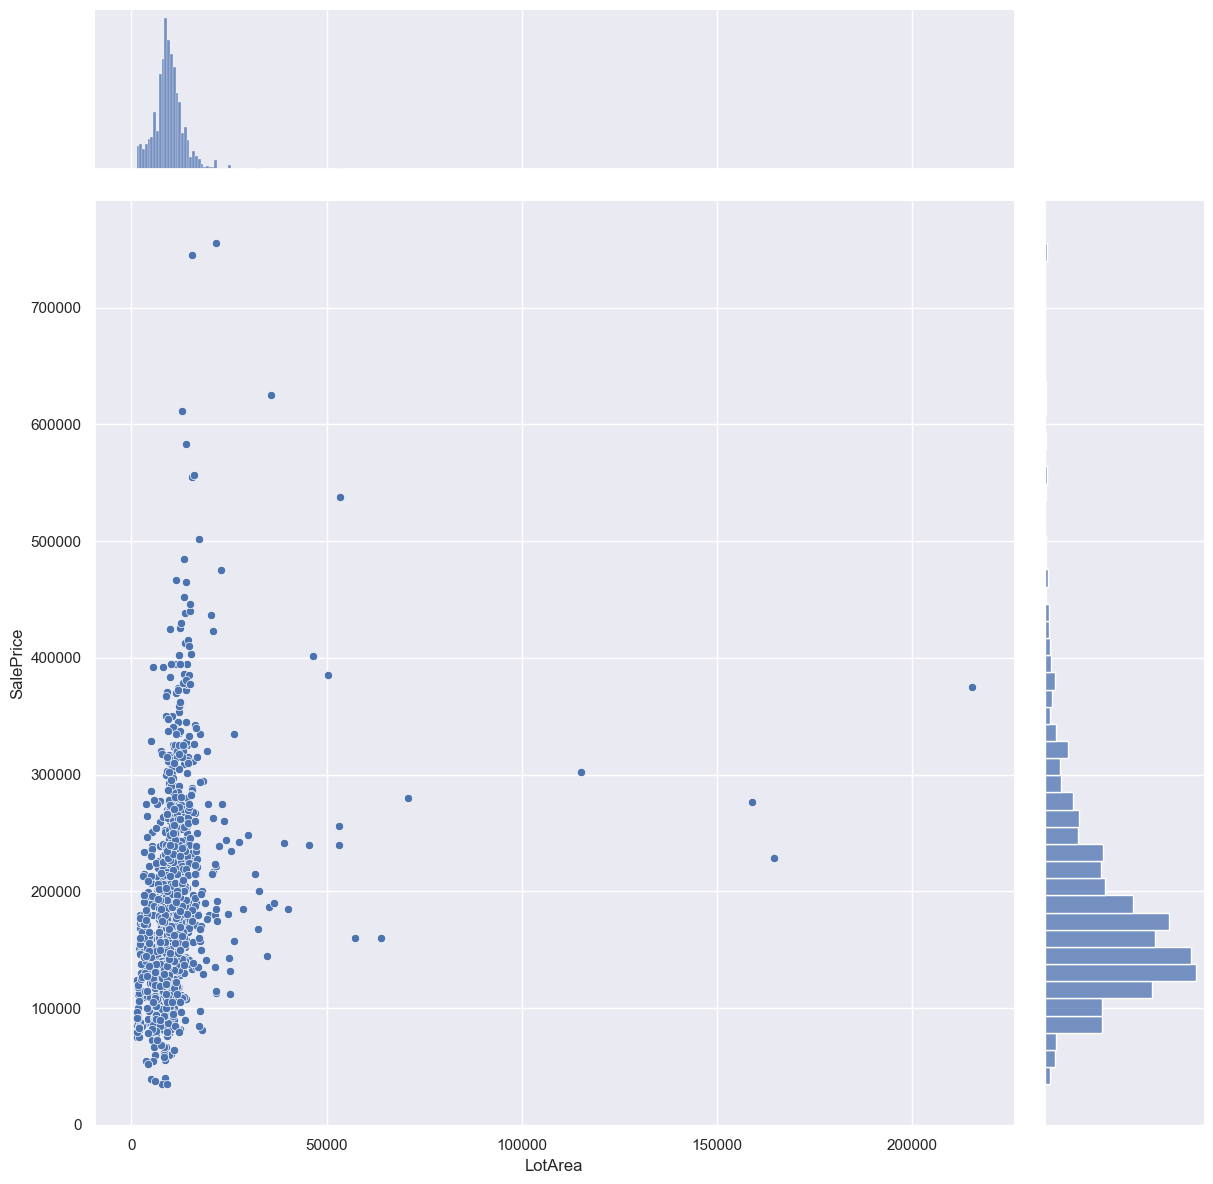

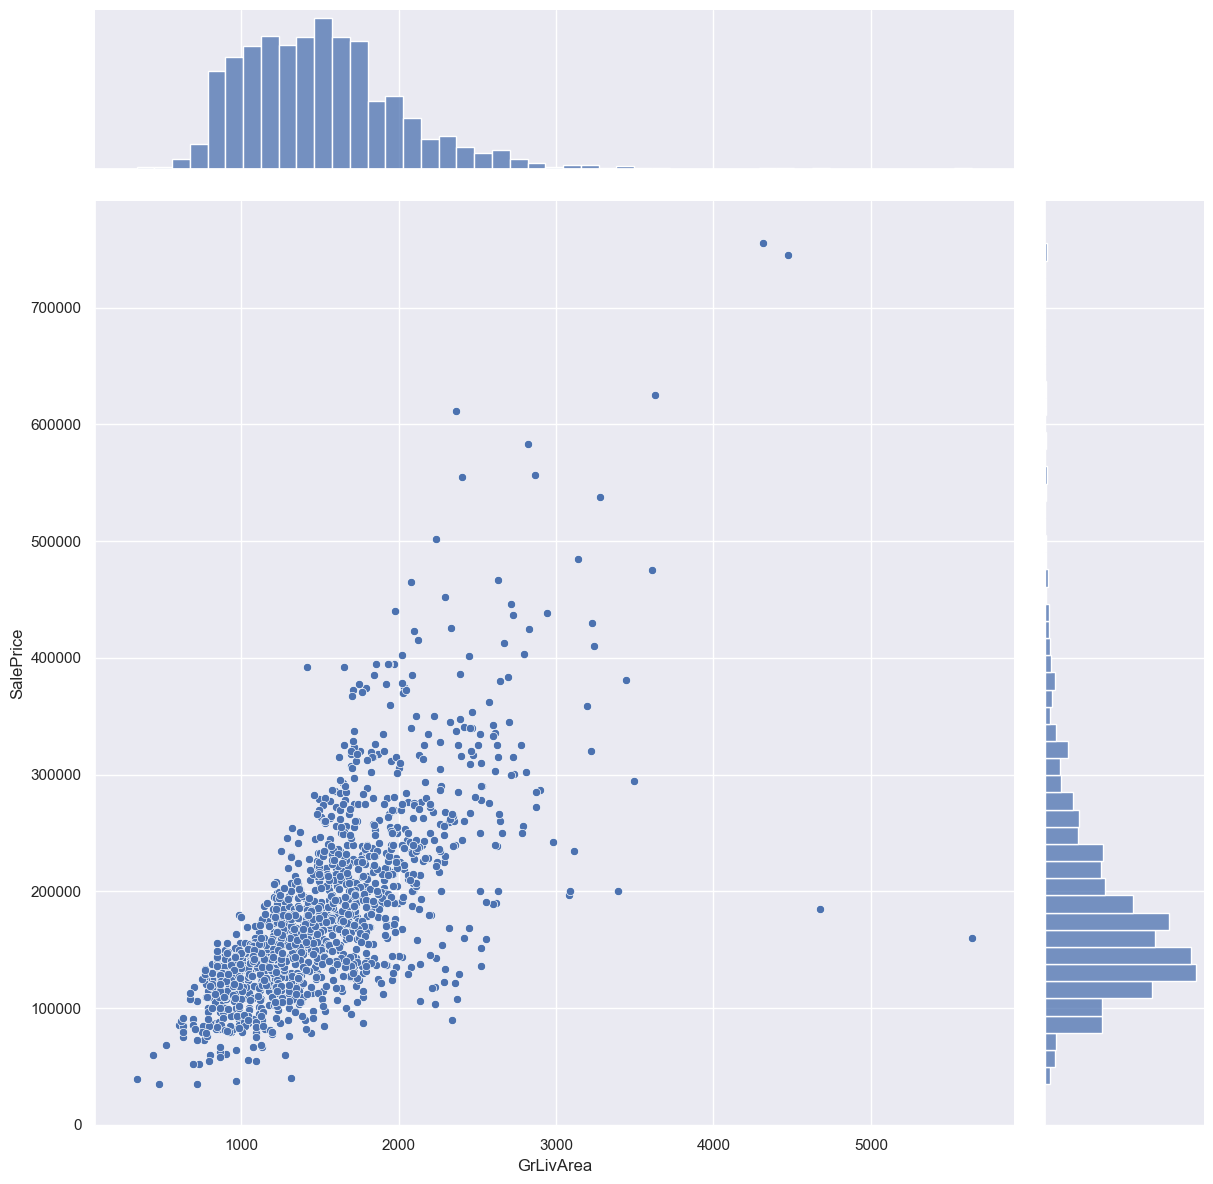

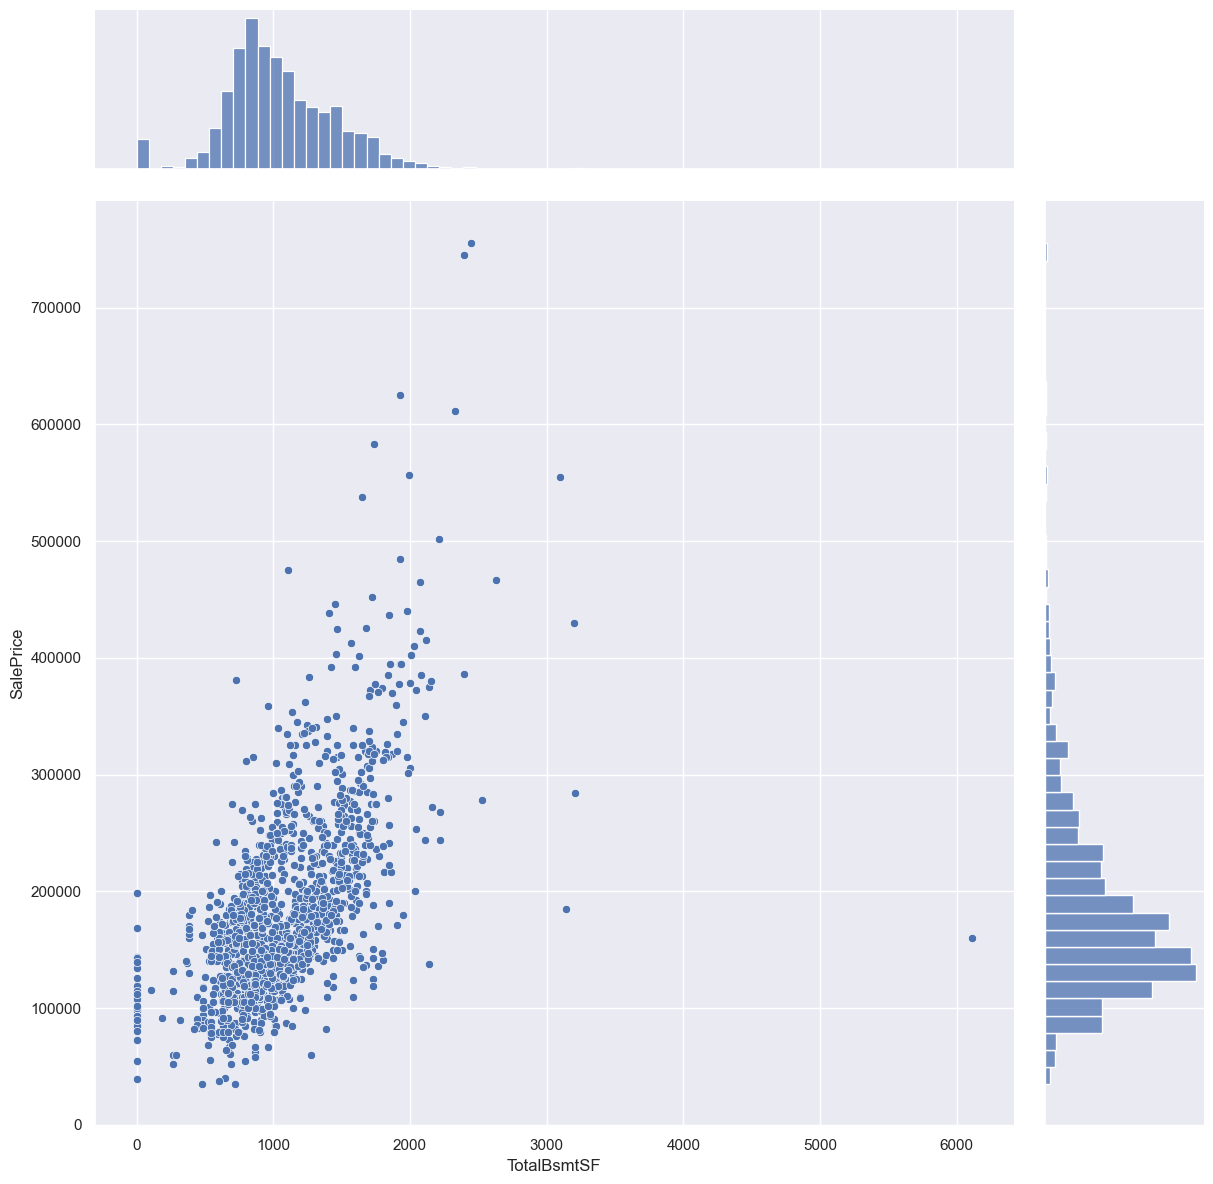

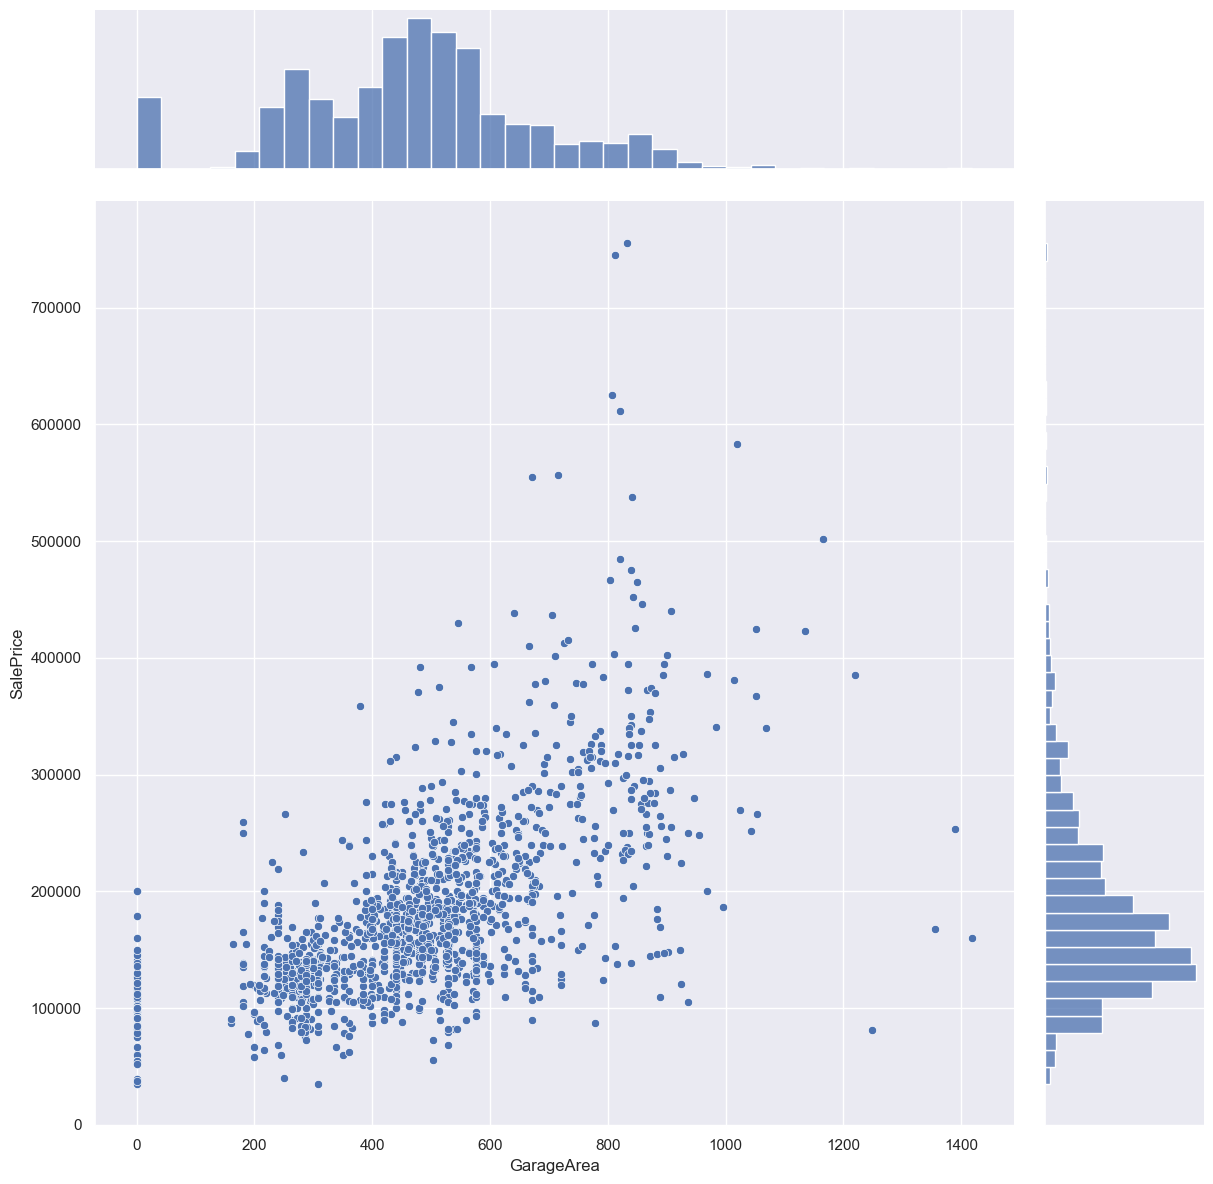

In [4]:
#Problem 1(c)

# For LotArea
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotarea, saleprice], axis = 1).reindex(lotarea.index)
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)


# For GrLivArea
jointDF = pd.concat([gr, saleprice], axis = 1).reindex(gr.index)
sb.jointplot(data = jointDF, x = "GrLivArea", y = "SalePrice", height = 12)


# For TotalBsmtSF
jointDF = pd.concat([total, saleprice], axis = 1).reindex(total.index)
sb.jointplot(data = jointDF, x = "TotalBsmtSF", y = "SalePrice", height = 12)


# For GarageArea
jointDF = pd.concat([garage, saleprice], axis = 1).reindex(garage.index)
sb.jointplot(data = jointDF, x = "GarageArea", y = "SalePrice", height = 12)

## Problem 2
## In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
## (a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

Neighborhood has the higher number of levels at 25. The Neighborhood 'NAmes' has the highest number of houses at 225.

In [5]:
ms = pd.DataFrame(train['MSSubClass'])
neighbor = pd.DataFrame(train['Neighborhood'])
bldg = pd.DataFrame(train['BldgType'])
overall = pd.DataFrame(train['OverallQual'])


# Print the number of levels for each variable
print("Number of levels of 'MSSubClass' =", len(train['MSSubClass'].unique()) ) 
print("Number of levels of 'Neighborhood' =", len(train['Neighborhood'].unique()) )
print("Number of levels of 'BldgType' =", len(train['BldgType'].unique()) ) 
print("Number of levels of 'OverallQual' =", len(train['OverallQual'].unique()) )

print(" ")

# Count the frequency of each unique house type for neighbor
frequency = neighbor['Neighborhood'].value_counts()

# Print the frequency of each unique house type
print(frequency)


Number of levels of 'MSSubClass' = 15
Number of levels of 'Neighborhood' = 25
Number of levels of 'BldgType' = 5
Number of levels of 'OverallQual' = 10
 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


## Problem 2(b)

NeighborHood and OverallQual are the 2 top variables that will help us in predicting saleprices. From the box plots, there is a significant correlation between types of Neighborhoods and median SalePrice, as well as between types of OverallQual and median SalePrice.

In other words, out of the 4 variables, different NeighborHoods and OverallQuals significantly influence SalePrice of the houses.


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

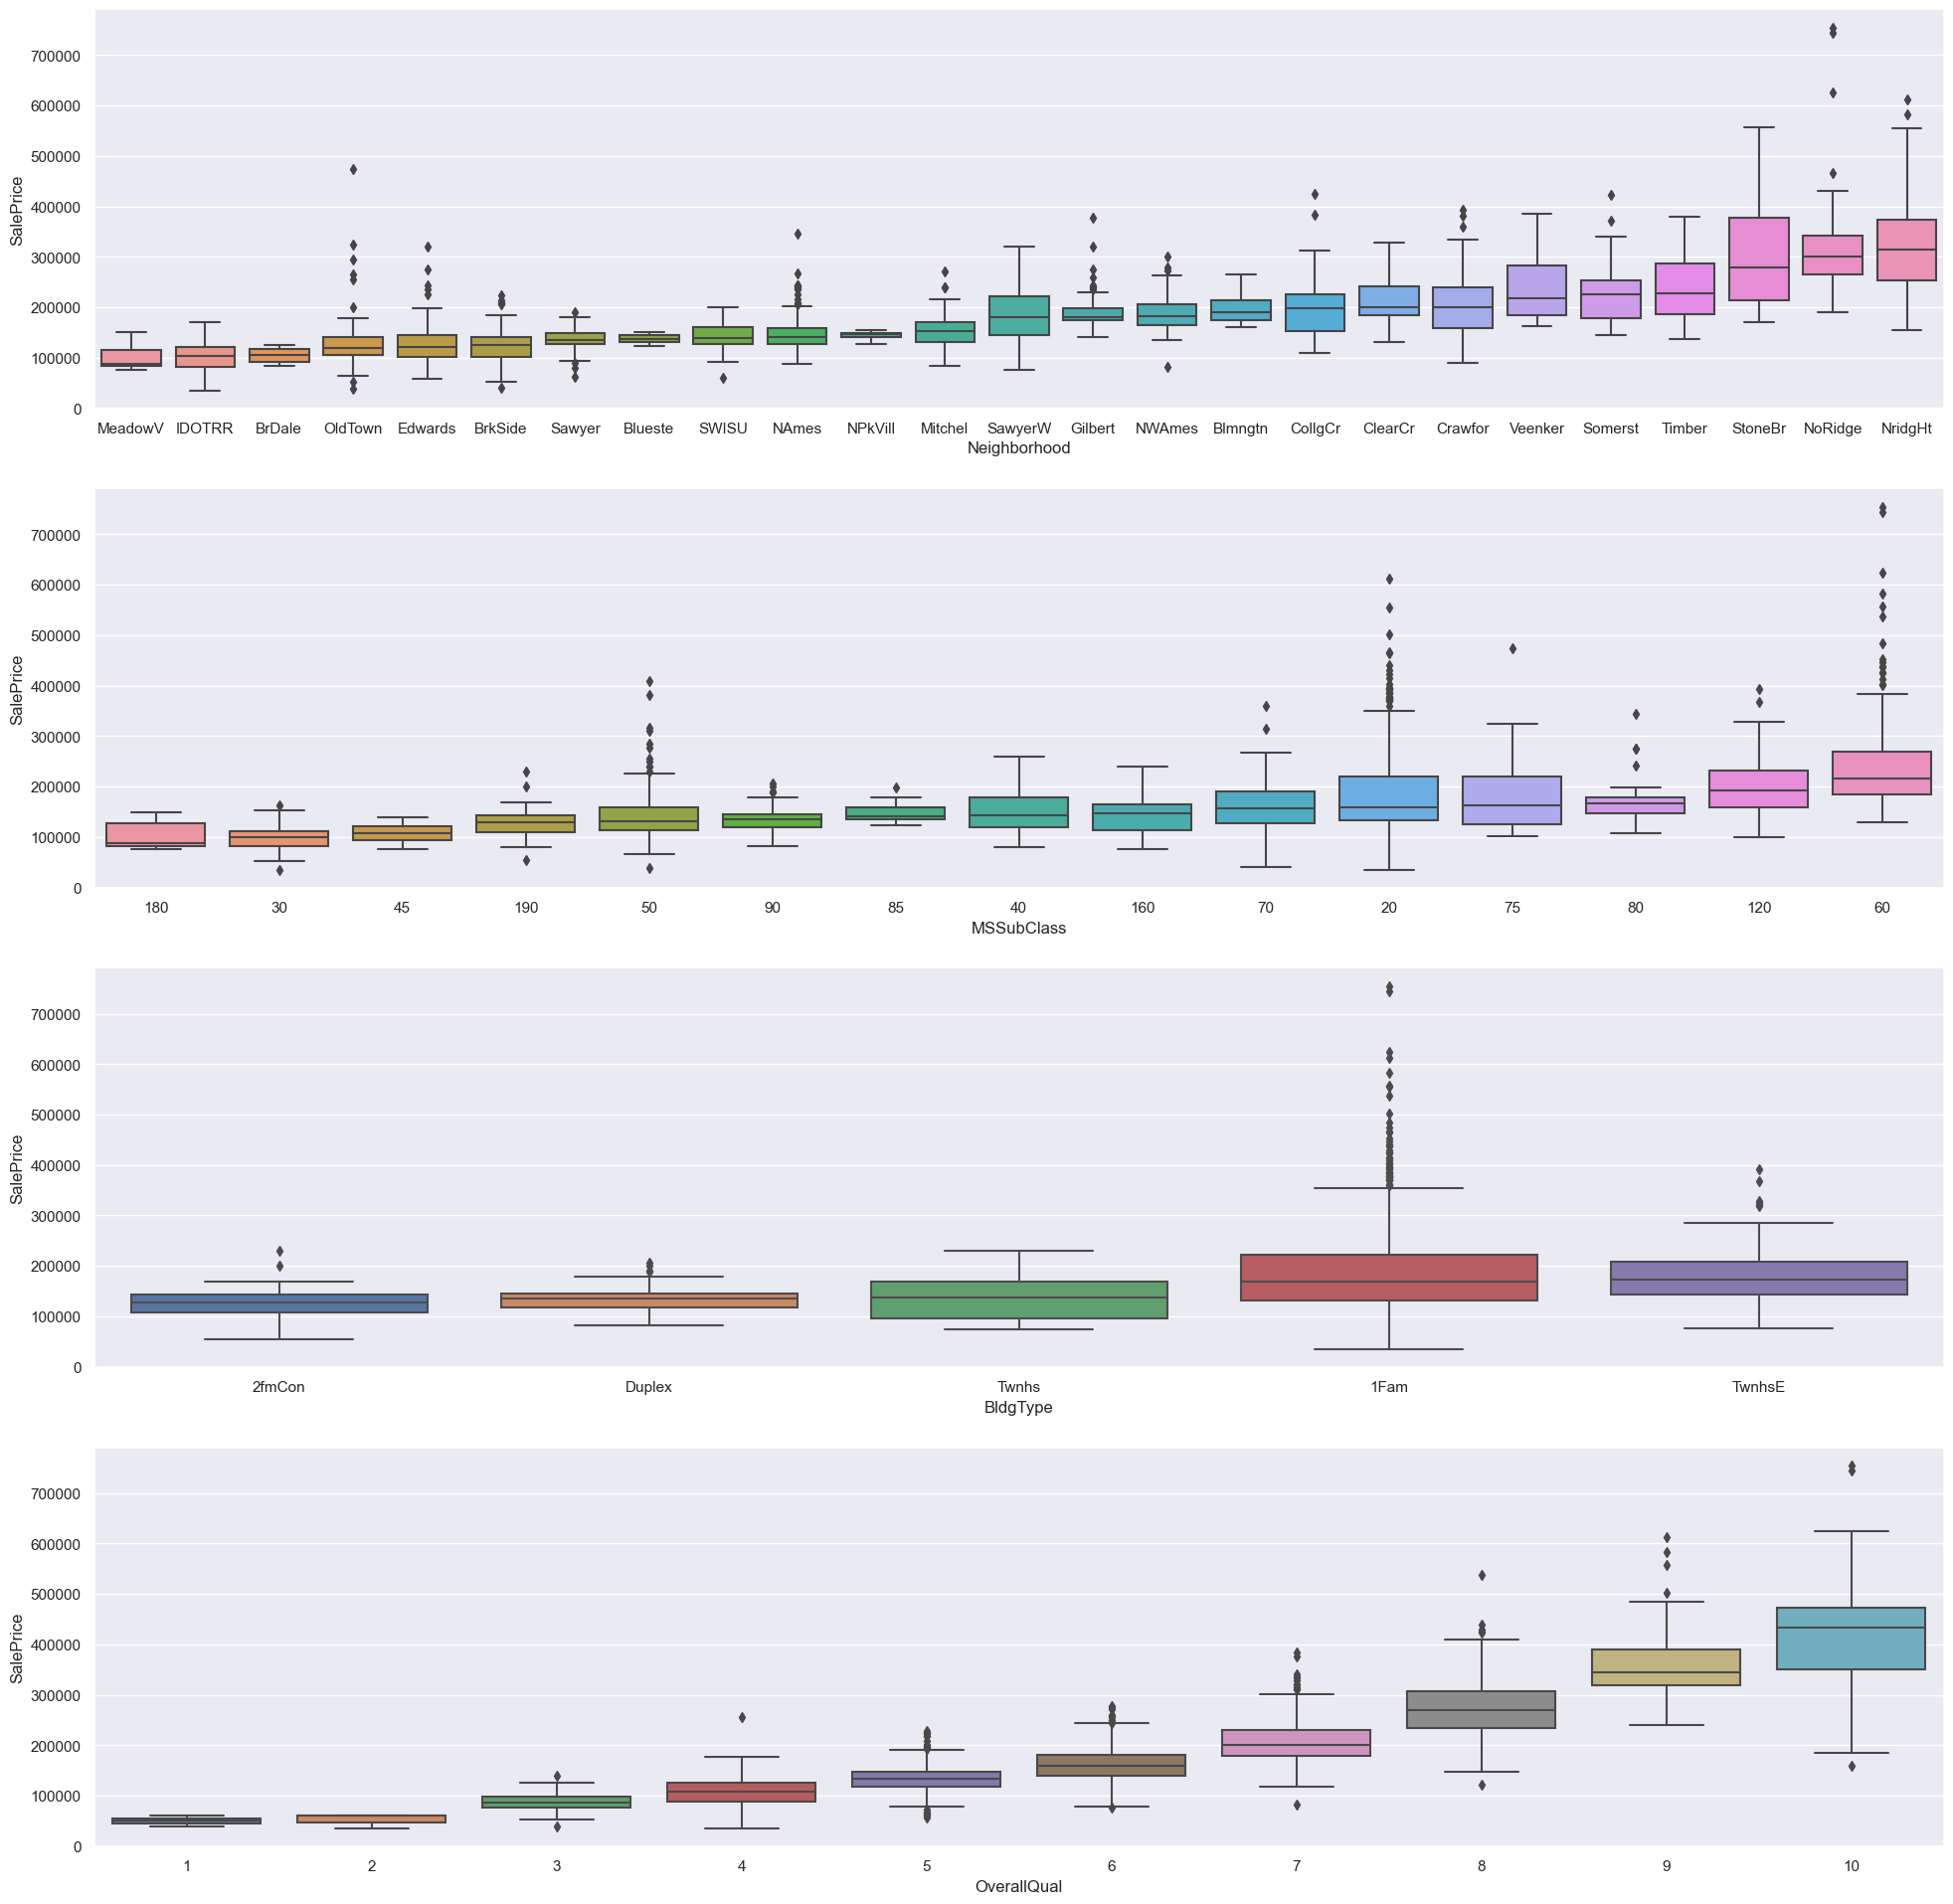

In [6]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))


# FOR NEIGHBOURHOOD VS SALEPRICE
# Group the data by neighborhood and find the median SalePrice of each neighborhood
neighbor_grouped = train.groupby('Neighborhood')['SalePrice'].median().reset_index()

# Sort the grouped data in ascending order of SalePrice
neighbor_grouped = neighbor_grouped.sort_values(by='SalePrice')

# Convert the Neighborhood column of the sorted grouped data into a list
neighbor_grouped = neighbor_grouped['Neighborhood'].tolist()

# Plot the box plot of SalePrice for each neighborhood in the specified order
sb.boxplot(x='Neighborhood', y='SalePrice', data=train, order=neighbor_grouped, ax = axes[0])



#FOR MSSUBCLASS VS SALEPRICE
ms_grouped = train.groupby('MSSubClass')['SalePrice'].median().reset_index()
ms_grouped = ms_grouped.sort_values(by='SalePrice')
ms_grouped = ms_grouped['MSSubClass'].tolist()
sb.boxplot(x='MSSubClass', y='SalePrice', data=train, order=ms_grouped, ax = axes[1])



#FOR BLDGTYPE VS SALEPRICE
bldg_grouped = train.groupby('BldgType')['SalePrice'].median().reset_index()
bldg_grouped = bldg_grouped.sort_values(by='SalePrice')
bldg_grouped = bldg_grouped['BldgType'].tolist()
sb.boxplot(x='BldgType', y='SalePrice', data=train, order=bldg_grouped, ax = axes[2])


#FOR OVERALLQUAL VS SALEPRICE
overall_grouped = train.groupby('OverallQual')['SalePrice'].median().reset_index()
overall_grouped = overall_grouped.sort_values(by='SalePrice')
overall_grouped = overall_grouped['OverallQual'].tolist()
sb.boxplot(x='OverallQual', y='SalePrice', data=train, order=overall_grouped, ax = axes[3])


## Problem 3 (a)
## Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

Yes, the sale price of a house is affected by the presence of a garage. From the plot, median saleprice of houses with garages are higher than the median saleprice of houses without a garage.

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

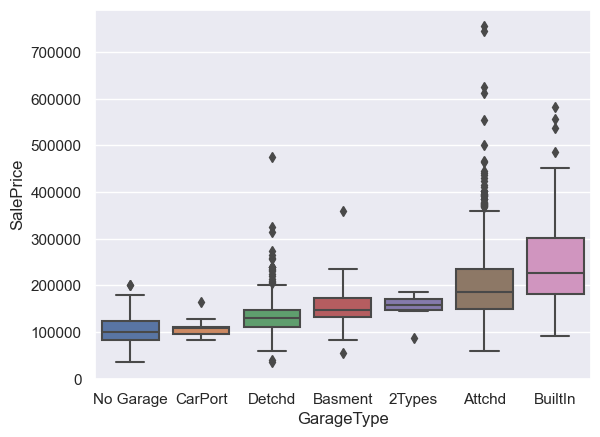

In [7]:
# Replace missing values in the GarageType column with the value "NA"
train['GarageType'].fillna("No Garage", inplace=True)

# Group the data by neighborhood and find the median SalePrice of each neighborhood
garage_grouped = train.groupby('GarageType')['SalePrice'].median().reset_index()

# Sort the grouped data in ascending order of SalePrice
garage_grouped = garage_grouped.sort_values(by='SalePrice')

# Convert the Neighborhood column of the sorted grouped data into a list
garage_grouped = garage_grouped['GarageType'].tolist()

# Plot the box plot of SalePrice for each neighborhood in the specified order
sb.boxplot(x='GarageType', y='SalePrice', data=train, order=garage_grouped)


